In [1]:
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Import DeepExplain
from deepexplain.tensorflow import DeepExplain
import warnings
warnings.filterwarnings('ignore')

rand_state = 91

In [3]:
dataset              = 'reference_log1p.pck'
bio_knowledge        = 'pbk_circuit_hsa_sig.txt'
experiment           = 'exper_melanoma'
analysis             = 'activation'
split='train_test_split_tuningFalse_filtergeneFalse'
model_name ='circuits_signaling_2_1_layer'
model = tf.keras.models.load_model(filepath=f'./models/{experiment}/{split}/design_{model_name}_reference_log1p_Adam_relu_0.h5')
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1210)              21773950  
_________________________________________________________________
layer3 (Dense)               (None, 5)                 6055      
Total params: 21,780,005
Trainable params: 21,780,005
Non-trainable params: 0
_________________________________________________________________


In [4]:
df = pd.read_pickle(os.path.join('./data/processed/', experiment, dataset))
ohe = OneHotEncoder()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
y_ohe = ohe.fit_transform(y).toarray()
# groups = y.reshape(1,-1)[0]

print(X.shape)
print(y.shape)
# print(groups.shape)
predictions = model.predict(X)

(2761, 17994)
(2761, 1)


In [9]:
current_session = tf.keras.backend.get_session()

with DeepExplain(session=current_session) as de:
    
    # Evaluate the embedding tensor on the model input (in other words, perform the lookup)
    concat_tensor = model.layers[1].input
    input_tensor = model.inputs[0]
    concat_out = current_session.run(concat_tensor, {input_tensor: X})

    xs = X
    ys = predictions
    
    # Run DeepExplain with the embedding as input
#     attributions = de.explain('elrp', model.layers[-1].output * ys, concat_tensor, concat_out)
    attributions = de.explain('saliency', model.layers[-1].output * ys, concat_tensor, concat_out)
    
    print("attributions shape --- {}".format(attributions.shape))

attributions shape --- (2761, 1210)


In [11]:
df_attributions = pd.DataFrame(attributions)
df_attributions

,0,1,2,3,4,5,6,7,8,9,...,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209
0,2.755735e-13,4.305414e-13,7.518872e-13,2.837576e-13,6.199258e-13,9.753423e-14,5.798408e-13,6.909317e-13,6.795832e-13,7.516287e-13,...,4.814833e-13,5.682295e-13,1.154685e-13,4.147175e-13,5.526821e-13,8.755738e-13,3.277427e-13,3.007521e-13,5.296960e-13,1.778029e-13
1,7.478283e-14,1.171543e-13,2.043753e-13,7.712891e-14,1.674202e-13,2.784764e-14,1.563046e-13,1.870372e-13,1.822807e-13,2.047165e-13,...,1.281420e-13,1.525248e-13,3.286779e-14,1.092177e-13,1.482542e-13,2.363786e-13,8.602475e-14,8.020195e-14,1.412805e-13,4.653690e-14
2,2.303660e-11,4.559876e-11,8.655773e-11,3.701395e-11,7.553901e-11,1.152164e-11,6.443007e-11,8.045295e-11,7.474898e-11,8.581150e-11,...,5.074213e-11,6.682232e-11,1.421440e-11,4.548908e-11,6.668308e-11,9.493867e-11,3.629998e-11,4.192352e-11,6.179143e-11,2.445507e-11
3,5.407261e-17,3.935900e-17,3.059125e-17,1.153602e-17,1.879216e-17,2.368972e-17,1.028856e-17,8.526581e-18,1.966566e-18,3.813601e-17,...,6.433783e-18,2.335860e-17,2.256678e-17,3.131972e-17,2.773240e-17,3.201693e-17,3.495534e-17,5.364724e-17,3.471117e-17,4.059385e-17
4,2.181767e-18,4.216440e-18,6.836568e-18,3.022313e-18,7.608457e-18,1.895039e-18,6.543781e-18,7.084275e-18,8.747550e-18,8.490417e-18,...,5.657658e-18,8.128190e-18,2.654327e-18,3.148743e-18,5.200887e-18,1.074198e-17,4.232498e-18,3.627536e-18,7.497425e-18,2.433959e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,4.887392e-10,6.891384e-10,1.147572e-09,4.003562e-10,9.256872e-10,1.443773e-10,9.142517e-10,1.053917e-09,1.085899e-09,1.157414e-09,...,7.893932e-10,8.763746e-10,1.684255e-10,6.643571e-10,8.289545e-10,1.400912e-09,5.303246e-10,4.116697e-10,8.246893e-10,2.407125e-10
2757,9.431421e-05,5.702846e-04,1.224295e-03,5.798115e-04,4.611533e-04,6.562257e-04,1.250453e-04,7.246105e-04,4.134154e-04,1.194131e-03,...,7.681488e-04,2.201151e-04,7.077247e-04,9.167672e-04,1.124776e-04,1.600494e-04,1.036715e-03,2.318194e-05,6.199781e-04,1.513156e-04
2758,1.785016e-11,2.988179e-11,5.359297e-11,2.103391e-11,4.406965e-11,7.544934e-12,3.989206e-11,4.886013e-11,4.588991e-11,5.332888e-11,...,3.161426e-11,3.916266e-11,8.915694e-12,2.730325e-11,3.891265e-11,5.977959e-11,2.115270e-11,2.192185e-11,3.592805e-11,1.287840e-11
2759,4.582316e-10,6.459127e-10,1.075422e-09,3.750813e-10,8.674498e-10,1.352644e-10,8.568949e-10,9.876709e-10,1.017840e-09,1.084677e-09,...,7.399951e-10,8.213530e-10,1.577896e-10,6.227525e-10,7.768273e-10,1.313084e-09,4.971420e-10,3.856675e-10,7.729538e-10,2.255057e-10


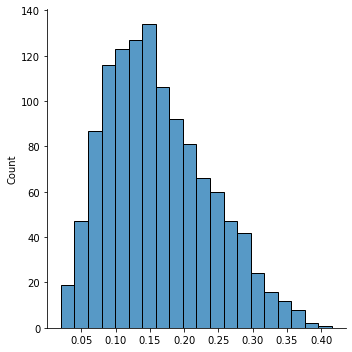

In [26]:
sns.displot(df_attributions.sum(axis=0))